SOAL VARIABEL RANDOM KONTINU
Waktu tunggu pelanggan di bank (dalam menit) mengikuti
distribusi eksponensial dengan rata-rata 5 menit.
Jika X = waktu tunggu (menit), maka λ = 1/5 = 0.2
Tentukan: PDF, CDF, dan P(2 < X < 8)

PERHITUNGAN MANUAL

1. Fungsi Densitas Probabilitas (PDF):
   f(x) = λe^(-λx) untuk x ≥ 0
   f(x) = 0.2 × e^(-0.2x) untuk x ≥ 0
   f(x) = 0 untuk x < 0

   Nilai PDF untuk beberapa x:
   f(0) = 0.2 × e^(-0.2×0) = 0.2000
   f(1) = 0.2 × e^(-0.2×1) = 0.1637
   f(2) = 0.2 × e^(-0.2×2) = 0.1341
   f(3) = 0.2 × e^(-0.2×3) = 0.1098
   f(4) = 0.2 × e^(-0.2×4) = 0.0899
   f(5) = 0.2 × e^(-0.2×5) = 0.0736
   f(6) = 0.2 × e^(-0.2×6) = 0.0602
   f(7) = 0.2 × e^(-0.2×7) = 0.0493
   f(8) = 0.2 × e^(-0.2×8) = 0.0404
   f(10) = 0.2 × e^(-0.2×10) = 0.0271

2. Fungsi Distribusi Kumulatif (CDF):
   F(x) = ∫[0 to x] λe^(-λt) dt
   F(x) = 1 - e^(-λx) untuk x ≥ 0
   F(x) = 1 - e^(-0.2x) untuk x ≥ 0
   F(x) = 0 untuk x < 0

   Nilai CDF untuk beberapa x:
   F(0) = 1 - e^(-0.2×0) = 0.0000
 

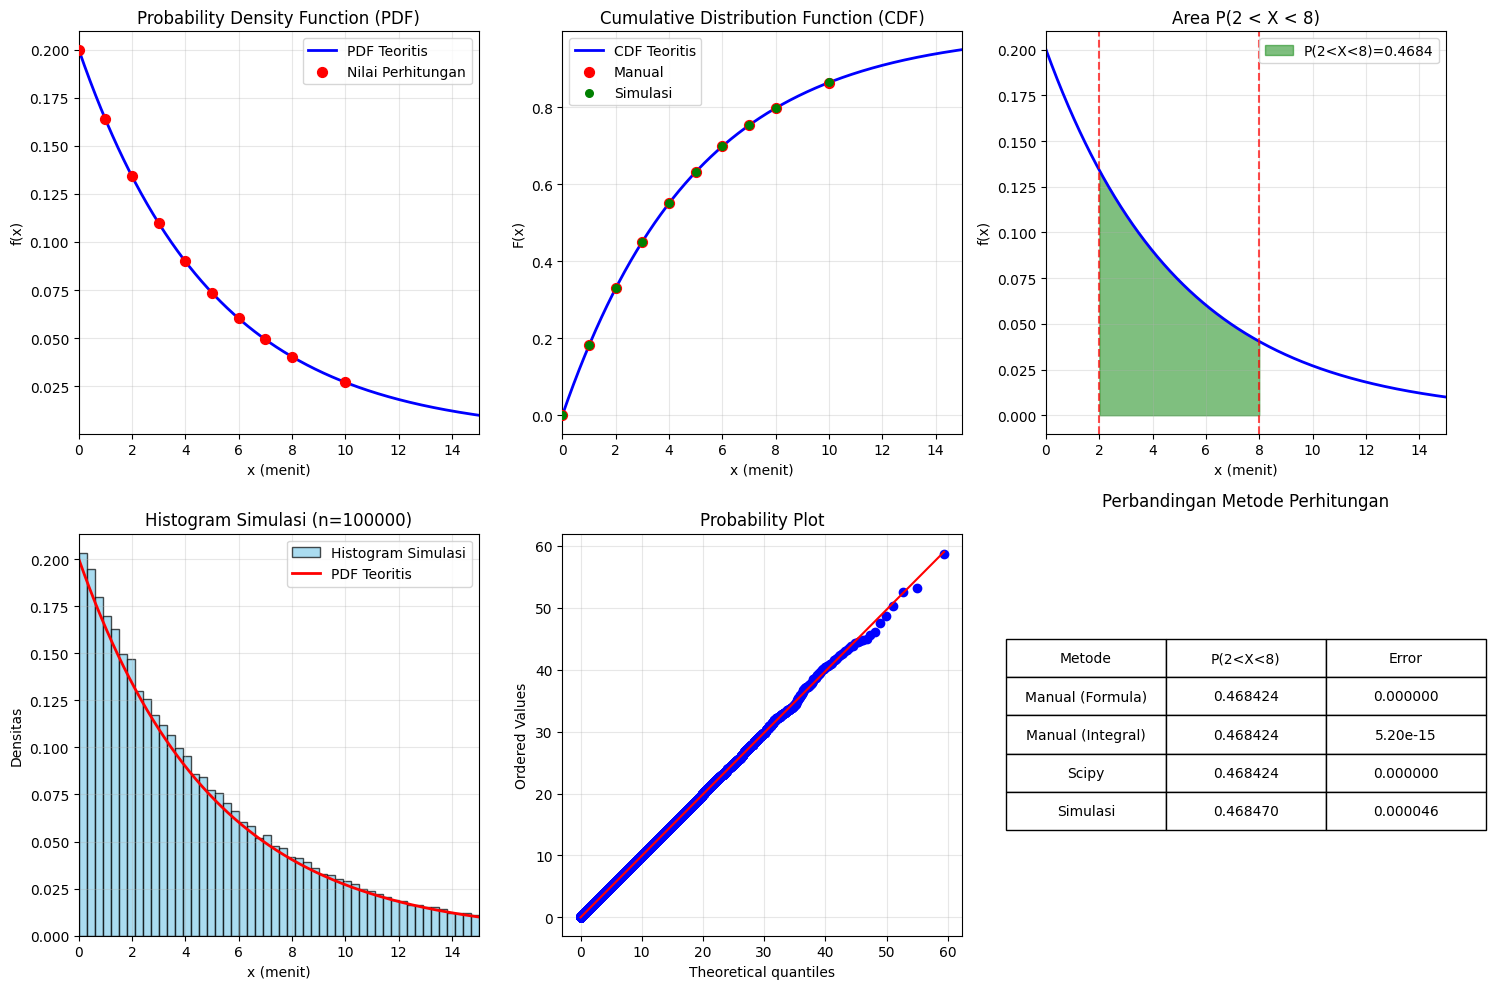


VERIFIKASI SIFAT-SIFAT DISTRIBUSI

1. Verifikasi PDF adalah fungsi densitas yang valid:
   ∫[0 to ∞] f(x)dx harus = 1
   Hasil integral: 1.000000 ✓

2. Verifikasi mean (nilai harapan):
   E[X] = 1/λ = 1/0.2 = 5
   Teoritis : 5.0000
   Simulasi : 4.9799
   Selisih  : 0.0201

3. Verifikasi variance:
   Var(X) = 1/λ² = 1/0.04 = 25
   Teoritis : 25.0000
   Simulasi : 24.6497
   Selisih  : 0.3503

KESIMPULAN
1. Hasil perhitungan manual, scipy, dan simulasi sangat konsisten
2. Distribusi eksponensial cocok untuk memodelkan waktu tunggu
3. Sifat memoryless: P(X > s+t | X > s) = P(X > t)
4. Parameter λ = 1/rata-rata menentukan bentuk distribusi
5. Simulasi Monte Carlo memberikan aproksimasi yang sangat baik


In [1]:
# VARIABEL RANDOM KONTINU - DISTRIBUSI EKSPONENSIAL
# Soal: Waktu tunggu pelanggan di bank (dalam menit) mengikuti distribusi eksponensial
# dengan rata-rata waktu tunggu 5 menit (λ = 1/5 = 0.2)
# Tentukan: PDF, CDF, dan P(2 < X < 8)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import quad
import pandas as pd

print("=" * 60)
print("SOAL VARIABEL RANDOM KONTINU")
print("=" * 60)
print("Waktu tunggu pelanggan di bank (dalam menit) mengikuti")
print("distribusi eksponensial dengan rata-rata 5 menit.")
print("Jika X = waktu tunggu (menit), maka λ = 1/5 = 0.2")
print("Tentukan: PDF, CDF, dan P(2 < X < 8)")
print()

# Parameter
lambda_param = 0.2  # λ = 1/rata-rata = 1/5

# 1. PERHITUNGAN MANUAL
print("=" * 60)
print("PERHITUNGAN MANUAL")
print("=" * 60)

print("\n1. Fungsi Densitas Probabilitas (PDF):")
print("   f(x) = λe^(-λx) untuk x ≥ 0")
print("   f(x) = 0.2 × e^(-0.2x) untuk x ≥ 0")
print("   f(x) = 0 untuk x < 0")

# Hitung PDF untuk beberapa nilai x
x_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10]
print("\n   Nilai PDF untuk beberapa x:")
pdf_manual = []
for x in x_values:
    if x >= 0:
        pdf_value = lambda_param * np.exp(-lambda_param * x)
    else:
        pdf_value = 0
    pdf_manual.append(pdf_value)
    print(f"   f({x}) = 0.2 × e^(-0.2×{x}) = {pdf_value:.4f}")

print("\n2. Fungsi Distribusi Kumulatif (CDF):")
print("   F(x) = ∫[0 to x] λe^(-λt) dt")
print("   F(x) = 1 - e^(-λx) untuk x ≥ 0")
print("   F(x) = 1 - e^(-0.2x) untuk x ≥ 0")
print("   F(x) = 0 untuk x < 0")

print("\n   Nilai CDF untuk beberapa x:")
cdf_manual = []
for x in x_values:
    if x >= 0:
        cdf_value = 1 - np.exp(-lambda_param * x)
    else:
        cdf_value = 0
    cdf_manual.append(cdf_value)
    print(f"   F({x}) = 1 - e^(-0.2×{x}) = {cdf_value:.4f}")

print("\n3. Menghitung P(2 < X < 8):")
print("   P(2 < X < 8) = F(8) - F(2)")
print("   = [1 - e^(-0.2×8)] - [1 - e^(-0.2×2)]")
print("   = e^(-0.2×2) - e^(-0.2×8)")

F_8 = 1 - np.exp(-lambda_param * 8)
F_2 = 1 - np.exp(-lambda_param * 2)
P_2_to_8_manual = F_8 - F_2

print(f"   = e^(-0.4) - e^(-1.6)")
print(f"   = {np.exp(-0.4):.4f} - {np.exp(-1.6):.4f}")
print(f"   = {P_2_to_8_manual:.4f}")

print("\n   Alternatif: Menggunakan integral")
print("   P(2 < X < 8) = ∫[2 to 8] 0.2×e^(-0.2x) dx")


# Fungsi PDF untuk integral
def pdf_exp(x):
    return lambda_param * np.exp(-lambda_param * x)


# Hitung integral
integral_result, error = quad(pdf_exp, 2, 8)
print(f"   = {integral_result:.4f} (dengan error numerik: {error:.2e})")

# 2. IMPLEMENTASI PYTHON DENGAN SCIPY
print("\n" + "=" * 60)
print("IMPLEMENTASI PYTHON DENGAN SCIPY")
print("=" * 60)

# Menggunakan scipy.stats untuk distribusi eksponensial
exp_dist = stats.expon(scale=1 / lambda_param)  # scale = 1/λ

print("\n1. PDF menggunakan scipy.stats:")
pdf_scipy = []
for x in x_values:
    pdf_value = exp_dist.pdf(x)
    pdf_scipy.append(pdf_value)
    print(f"   f({x}) = {pdf_value:.4f}")

print("\n2. CDF menggunakan scipy.stats:")
cdf_scipy = []
for x in x_values:
    cdf_value = exp_dist.cdf(x)
    cdf_scipy.append(cdf_value)
    print(f"   F({x}) = {cdf_value:.4f}")

print("\n3. P(2 < X < 8) menggunakan scipy.stats:")
P_2_to_8_scipy = exp_dist.cdf(8) - exp_dist.cdf(2)
print(f"   P(2 < X < 8) = F(8) - F(2) = {P_2_to_8_scipy:.4f}")

# 3. SIMULASI MONTE CARLO
print("\n" + "=" * 60)
print("SIMULASI MONTE CARLO")
print("=" * 60)

np.random.seed(42)
n_simulations = 100000
print(f"\nMenggunakan {n_simulations} sampel random:")

# Generate sampel dari distribusi eksponensial
sampel_simulasi = np.random.exponential(scale=1 / lambda_param, size=n_simulations)

print("\n1. Statistik sampel:")
print(f"   Rata-rata sampel: {np.mean(sampel_simulasi):.4f} (teoritis: 5.0000)")
print(f"   Standar deviasi sampel: {np.std(sampel_simulasi):.4f} (teoritis: 5.0000)")

print("\n2. Estimasi CDF dari simulasi:")
cdf_simulasi = []
for x in x_values:
    cdf_value = np.mean(sampel_simulasi <= x)
    cdf_simulasi.append(cdf_value)
    print(f"   F({x}) ≈ {cdf_value:.4f}")

print("\n3. P(2 < X < 8) dari simulasi:")
P_2_to_8_simulasi = np.mean((sampel_simulasi > 2) & (sampel_simulasi < 8))
print(f"   P(2 < X < 8) ≈ {P_2_to_8_simulasi:.4f}")

# 4. PERBANDINGAN HASIL
print("\n" + "=" * 60)
print("PERBANDINGAN HASIL")
print("=" * 60)

df_comparison = pd.DataFrame(
    {
        "x": x_values,
        "PDF Manual": pdf_manual,
        "PDF Scipy": pdf_scipy,
        "CDF Manual": cdf_manual,
        "CDF Scipy": cdf_scipy,
        "CDF Simulasi": cdf_simulasi,
    }
)

print("\nTabel Perbandingan:")
print(df_comparison.to_string(index=False))

print("\n\nP(2 < X < 8):")
print(f"  Manual (formula)  : {P_2_to_8_manual:.6f}")
print(f"  Manual (integral) : {integral_result:.6f}")
print(f"  Scipy            : {P_2_to_8_scipy:.6f}")
print(f"  Simulasi         : {P_2_to_8_simulasi:.6f}")

# 5. VISUALISASI
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Range untuk plot kontinu
x_cont = np.linspace(0, 15, 1000)
pdf_cont = lambda_param * np.exp(-lambda_param * x_cont)
cdf_cont = 1 - np.exp(-lambda_param * x_cont)

# Plot PDF
axes[0, 0].plot(x_cont, pdf_cont, "b-", label="PDF Teoritis", linewidth=2)
axes[0, 0].scatter(
    x_values, pdf_manual, color="red", s=50, label="Nilai Perhitungan", zorder=5
)
axes[0, 0].set_xlabel("x (menit)")
axes[0, 0].set_ylabel("f(x)")
axes[0, 0].set_title("Probability Density Function (PDF)")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(0, 15)

# Plot CDF
axes[0, 1].plot(x_cont, cdf_cont, "b-", label="CDF Teoritis", linewidth=2)
axes[0, 1].scatter(x_values, cdf_manual, color="red", s=50, label="Manual", zorder=5)
axes[0, 1].scatter(
    x_values, cdf_simulasi, color="green", s=30, label="Simulasi", zorder=5
)
axes[0, 1].set_xlabel("x (menit)")
axes[0, 1].set_ylabel("F(x)")
axes[0, 1].set_title("Cumulative Distribution Function (CDF)")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(0, 15)

# Area P(2 < X < 8)
x_area = np.linspace(2, 8, 100)
pdf_area = lambda_param * np.exp(-lambda_param * x_area)
axes[0, 2].plot(x_cont, pdf_cont, "b-", linewidth=2)
axes[0, 2].fill_between(
    x_area,
    0,
    pdf_area,
    alpha=0.5,
    color="green",
    label=f"P(2<X<8)={P_2_to_8_manual:.4f}",
)
axes[0, 2].axvline(x=2, color="red", linestyle="--", alpha=0.7)
axes[0, 2].axvline(x=8, color="red", linestyle="--", alpha=0.7)
axes[0, 2].set_xlabel("x (menit)")
axes[0, 2].set_ylabel("f(x)")
axes[0, 2].set_title("Area P(2 < X < 8)")
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_xlim(0, 15)

# Histogram simulasi
axes[1, 0].hist(
    sampel_simulasi[sampel_simulasi <= 15],
    bins=50,
    density=True,
    alpha=0.7,
    color="skyblue",
    edgecolor="black",
    label="Histogram Simulasi",
)
axes[1, 0].plot(x_cont, pdf_cont, "r-", linewidth=2, label="PDF Teoritis")
axes[1, 0].set_xlabel("x (menit)")
axes[1, 0].set_ylabel("Densitas")
axes[1, 0].set_title(f"Histogram Simulasi (n={n_simulations})")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, 15)

# Q-Q Plot
from scipy import stats

axes[1, 1].set_title("Q-Q Plot")
stats.probplot(
    sampel_simulasi, dist=stats.expon(scale=1 / lambda_param), plot=axes[1, 1]
)
axes[1, 1].grid(True, alpha=0.3)

# Tabel perbandingan detail
axes[1, 2].axis("tight")
axes[1, 2].axis("off")
table_data = [
    ["Metode", "P(2<X<8)", "Error"],
    ["Manual (Formula)", f"{P_2_to_8_manual:.6f}", "0.000000"],
    ["Manual (Integral)", f"{integral_result:.6f}", f"{error:.2e}"],
    ["Scipy", f"{P_2_to_8_scipy:.6f}", f"{abs(P_2_to_8_scipy - P_2_to_8_manual):.6f}"],
    [
        "Simulasi",
        f"{P_2_to_8_simulasi:.6f}",
        f"{abs(P_2_to_8_simulasi - P_2_to_8_manual):.6f}",
    ],
]
table = axes[1, 2].table(cellText=table_data, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
axes[1, 2].set_title("Perbandingan Metode Perhitungan", pad=20)

plt.tight_layout()
plt.show()

# 6. VERIFIKASI SIFAT-SIFAT
print("\n" + "=" * 60)
print("VERIFIKASI SIFAT-SIFAT DISTRIBUSI")
print("=" * 60)

print("\n1. Verifikasi PDF adalah fungsi densitas yang valid:")
print("   ∫[0 to ∞] f(x)dx harus = 1")
integral_total, _ = quad(pdf_exp, 0, np.inf)
print(f"   Hasil integral: {integral_total:.6f} ✓")

print("\n2. Verifikasi mean (nilai harapan):")
print("   E[X] = 1/λ = 1/0.2 = 5")
mean_teoritis = 1 / lambda_param
mean_simulasi = np.mean(sampel_simulasi)
print(f"   Teoritis : {mean_teoritis:.4f}")
print(f"   Simulasi : {mean_simulasi:.4f}")
print(f"   Selisih  : {abs(mean_teoritis - mean_simulasi):.4f}")

print("\n3. Verifikasi variance:")
print("   Var(X) = 1/λ² = 1/0.04 = 25")
var_teoritis = 1 / (lambda_param**2)
var_simulasi = np.var(sampel_simulasi)
print(f"   Teoritis : {var_teoritis:.4f}")
print(f"   Simulasi : {var_simulasi:.4f}")
print(f"   Selisih  : {abs(var_teoritis - var_simulasi):.4f}")

# 7. KESIMPULAN
print("\n" + "=" * 60)
print("KESIMPULAN")
print("=" * 60)
print("1. Hasil perhitungan manual, scipy, dan simulasi sangat konsisten")
print("2. Distribusi eksponensial cocok untuk memodelkan waktu tunggu")
print("3. Sifat memoryless: P(X > s+t | X > s) = P(X > t)")
print("4. Parameter λ = 1/rata-rata menentukan bentuk distribusi")
print("5. Simulasi Monte Carlo memberikan aproksimasi yang sangat baik")